In [39]:
import numpy as np
from smt.surrogate_models import KRG, RBF
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [40]:
generating_df = pd.read_csv('monte_carlo_10000.csv').drop(columns=['sample'])
training_df = pd.read_csv('training_data.csv')

In [46]:
X = training_df[['outer_wall_thickness', 'inside_wall_side_thickness', 'inside_wall_middle_thickness', 'height', 'width', 'sigma0', 'youngs']].values
Y = training_df[['mean_force']].values

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
generating_array = generating_df[['outer_wall_thickness', 'inside_wall_side_thickness', 'inside_wall_middle_thickness', 'height', 'width', 'sigma0', 'youngs']].values
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
generating_array_scaled = scaler.transform(generating_array)
X_val = scaler.transform(X_val)

[[0.66666667 0.42372881 0.79661017 ... 0.42028986 0.72406928 0.73138292]
 [0.87179487 0.98305085 0.3220339  ... 0.33333333 0.7011746  0.20014394]
 [0.33333333 0.84745763 0.55932203 ... 0.83333333 0.9406729  0.19049984]
 ...
 [0.43589744 0.76271186 0.27118644 ... 0.13043478 0.33207247 0.32093274]
 [0.46153846 0.69491525 0.42372881 ... 0.84782609 0.53135576 0.40017993]
 [0.23076923 0.15254237 0.27118644 ... 0.55797101 0.08261995 0.18668538]]


[-1.00000000e+01 -8.98898899e+00 -7.97797798e+00 -6.96696697e+00
 -5.95595596e+00 -4.94494494e+00 -3.93393393e+00 -2.92292292e+00
 -1.91191191e+00 -9.00900901e-01  1.10110110e-01  1.12112112e+00
  2.13213213e+00  3.14314314e+00  4.15415415e+00  5.16516517e+00
  6.17617618e+00  7.18718719e+00  8.19819820e+00  9.20920921e+00
  1.02202202e+01  1.12312312e+01  1.22422422e+01  1.32532533e+01
  1.42642643e+01  1.52752753e+01  1.62862863e+01  1.72972973e+01
  1.83083083e+01  1.93193193e+01  2.03303303e+01  2.13413413e+01
  2.23523524e+01  2.33633634e+01  2.43743744e+01  2.53853854e+01
  2.63963964e+01  2.74074074e+01  2.84184184e+01  2.94294294e+01
  3.04404404e+01  3.14514515e+01  3.24624625e+01  3.34734735e+01
  3.44844845e+01  3.54954955e+01  3.65065065e+01  3.75175175e+01
  3.85285285e+01  3.95395395e+01  4.05505506e+01  4.15615616e+01
  4.25725726e+01  4.35835836e+01  4.45945946e+01  4.56056056e+01
  4.66166166e+01  4.76276276e+01  4.86386386e+01  4.96496496e+01
  5.06606607e+01  5.16716

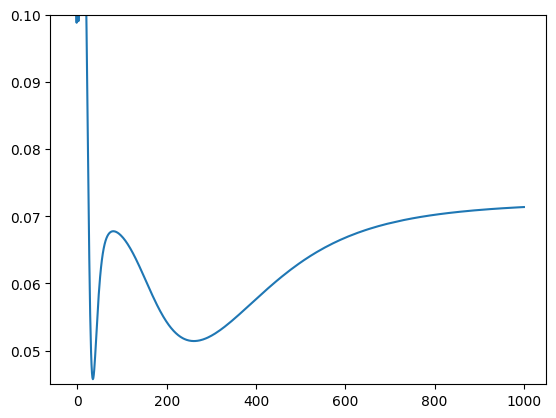

In [63]:
d0_values = np.linspace(-10, 1000, 1000)
print(d0_values)
results = {}
for i in range(len(d0_values)):
    RBF_model = RBF(d0=d0_values[i])
    RBF_model.set_training_values(X_train, Y_train)
    RBF_model.train()
    Y_pred = RBF_model.predict_values(X_val)
    mse = mean_squared_error(Y_val, Y_pred)
    results[d0_values[i]] = mse

plt.ylim(0.045, 0.1)
plt.plot(results.keys(), results.values())


In [43]:
RBF_model = RBF(d0=min(results, key=results.get))
RBF_model.set_training_values(X_train, Y_train)
RBF_model.train()

___________________________________________________________________________
   
                                    RBF
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 80
   
___________________________________________________________________________
   
 Training
   
   Training ...
      Initializing linear solver ...
         Performing LU fact. (80 x 80 mtx) ...
         Performing LU fact. (80 x 80 mtx) - done. Time (sec):  0.0000730
      Initializing linear solver - done. Time (sec):  0.0000951
      Solving linear system (col. 0) ...
         Back solving (80 x 80 mtx) ...
         Back solving (80 x 80 mtx) - done. Time (sec):  0.0000179
      Solving linear system (col. 0) - done. Time (sec):  0.0000372
   Training - done. Time (sec):  0.0003941


In [47]:
predicted_values = RBF_model.predict_values(generating_array_scaled)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 10000
   
   Predicting ...
   Predicting - done. Time (sec):  0.0576558
   
   Prediction time/pt. (sec) :  0.0000058
   


In [48]:
predicted_values

array([[27.16965199],
       [26.23934174],
       [25.799613  ],
       ...,
       [24.27069759],
       [25.3403101 ],
       [21.96601105]])